In [66]:
import math
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns

In [67]:
%run Bayesian-model.ipynb

/var/folders/gd/crxq4l256sx5f_sx6kdf41tr0000gn/T/ipykernel_5633/847044122.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(others, ignore_index = True)


#### Rational Listener Interpretation
$P_L(w|m) \propto P(w) \times P_s(m|w)$


     ziji: 张伟说小明总把自己弄糊涂 = {w1,w2}
     taziji: 张伟说小明总把他自己弄糊涂 = {w2}
     ta: 张伟说小明总把他弄糊涂 = {w1,w3}
     Zhangwei says Xiaoming always makes self/himself/him confused.
  <br/>
 
     W: worlds
         w1: Speaker
         w2: Clause Subject
         w3: Others
     
     M: messages {ziji, ta, taziji}

In [68]:
data = pd.read_csv("final_data_bySenID.csv", index_col=[0])

# add others to the dataset because in the second experiment, I did not add that condition
others = {'senID':[i for i in range(1,31)],
        'experiment':['likelihood' for x in range(1,31)],
        'condition': ['Others' for x in range(1,31)],
        'selection':['ta' for x in range(1,31)],
        'Prob':[1 for x in range(1,31)]
       }
others = pd.DataFrame(others)
others['type'] = np.where(others['senID'] < 15, 'co-argument', 'possessor')
data = data.append(others, ignore_index = True) 
# data



/var/folders/gd/crxq4l256sx5f_sx6kdf41tr0000gn/T/ipykernel_5633/3667851347.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(others, ignore_index = True)


In [69]:
mapping = [ ('Speaker', 'Non-local NP'), ('Clause Subject', 'Local NP'), ('co-argument', 'coargument')]
for k, v in mapping:
    data = data.replace(k, v)
# data


In [70]:
df = process_data(data)
df


/var/folders/gd/crxq4l256sx5f_sx6kdf41tr0000gn/T/ipykernel_5633/847044122.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(others, ignore_index = True)


,senID,c1,c2,c3,posterior,prior,likelihood,estimate_posterior
0,1,coargument,Non-local NP,ta,0.882353,0.750000,0.500000,0.696133
3,1,coargument,Local NP,ta,0.098039,0.107143,0.194444,0.038674
6,1,coargument,Others,ta,0.019608,0.142857,1.000000,0.265193
1,1,coargument,Non-local NP,taziji,0.279070,0.750000,0.107143,0.574468
4,1,coargument,Local NP,taziji,0.697674,0.107143,0.555556,0.425532
...,...,...,...,...,...,...,...,...
164,30,possessor,Others,ta,0.023256,0.250000,1.000000,0.270227
158,30,possessor,Non-local NP,taziji,0.195122,0.571429,0.105263,0.309927
161,30,possessor,Local NP,taziji,0.804878,0.178571,0.750000,0.690073
159,30,possessor,Non-local NP,ziji,0.509804,0.571429,0.131579,0.746667


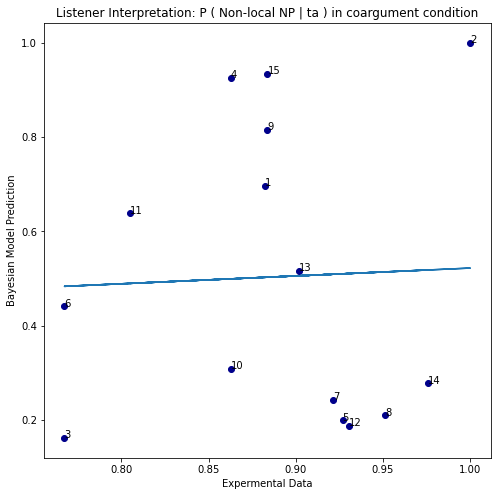

x: mean=0.888 stdv=0.066
y: mean=0.503 stdv=0.297
Statistics: LinregressResult(slope=0.16668477033185572, intercept=0.3554032954873756, rvalue=0.037331792769902714, pvalue=0.8949156666782134, stderr=1.237492448265714, intercept_stderr=1.1021648537993214)
R-squared: 0.001394
Pearsons correlation: 0.037
covariance is:  [[0.00472505 0.00078759]
 [0.00078759 0.09419782]]
pval = 0.8949156666782134, accept null hypothesis


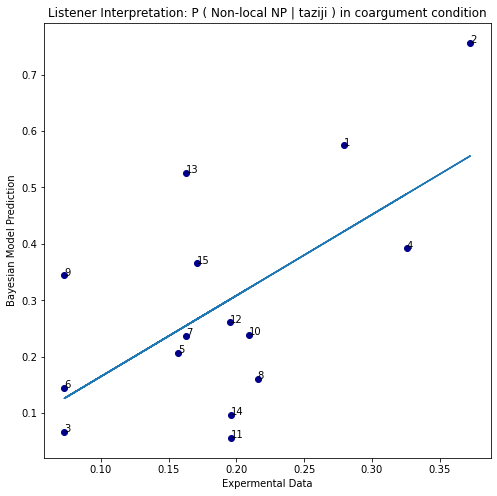

x: mean=0.191 stdv=0.084
y: mean=0.295 stdv=0.194
Statistics: LinregressResult(slope=1.4355096796008027, intercept=0.021213456466879388, rvalue=0.6171733822349746, pvalue=0.01424149614700277, stderr=0.5075824729143417, intercept_stderr=0.10572580961566815)
R-squared: 0.380903
Pearsons correlation: 0.617
covariance is:  [[0.0074757  0.01073144]
 [0.01073144 0.04044359]]
pval = 0.01424149614700277, reject null hypothesis


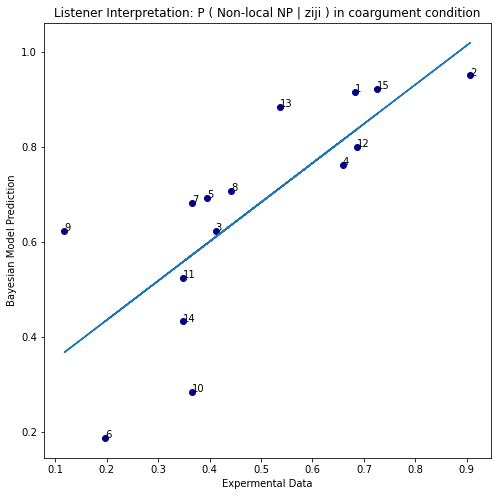

x: mean=0.479 stdv=0.208
y: mean=0.667 stdv=0.222
Statistics: LinregressResult(slope=0.8261476420844098, intercept=0.2705733699472443, rvalue=0.7720048911633136, pvalue=0.0007456804805077152, stderr=0.18865189103232885, intercept_stderr=0.09853759325794743)
R-squared: 0.595992
Pearsons correlation: 0.772
covariance is:  [[0.04621612 0.03818134]
 [0.03818134 0.05292596]]
pval = 0.0007456804805077152, reject null hypothesis


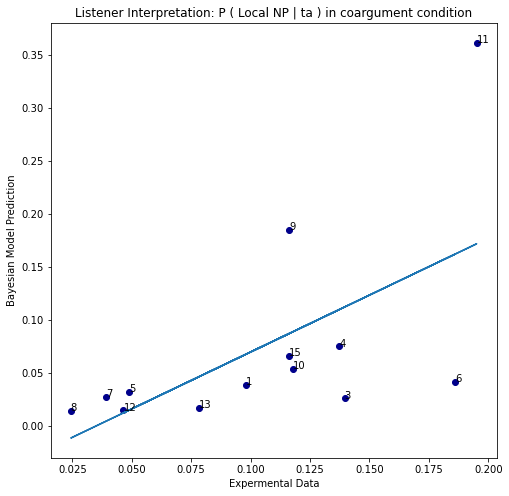

x: mean=0.103 stdv=0.052
y: mean=0.073 stdv=0.094
Statistics: LinregressResult(slope=1.0742731110317456, intercept=-0.037740934215374, rvalue=0.5978202438172252, pvalue=0.030934607852828526, stderr=0.4343319806645068, intercept_stderr=0.050294304170292875)
R-squared: 0.357389
Pearsons correlation: 0.598
covariance is:  [[0.00295532 0.00317482]
 [0.00317482 0.00954317]]
pval = 0.030934607852828526, reject null hypothesis


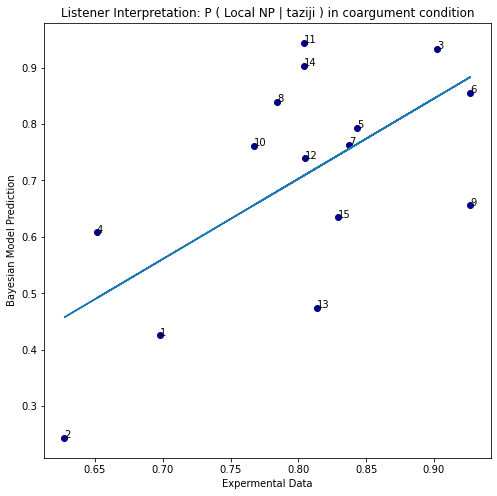

x: mean=0.801 stdv=0.086
y: mean=0.705 stdv=0.194
Statistics: LinregressResult(slope=1.4226429267103342, intercept=-0.4351756607824562, rvalue=0.6290175574250343, pvalue=0.012000439883612317, stderr=0.48764191225254555, intercept_stderr=0.39301655122466006)
R-squared: 0.395663
Pearsons correlation: 0.629
covariance is:  [[0.00790648 0.0112481 ]
 [0.0112481  0.04044359]]
pval = 0.012000439883612317, reject null hypothesis


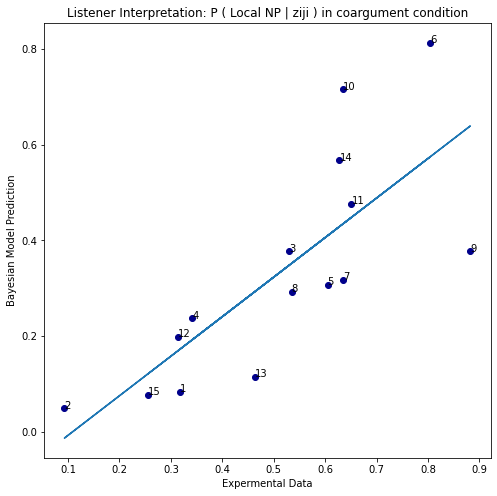

x: mean=0.512 stdv=0.207
y: mean=0.333 stdv=0.222
Statistics: LinregressResult(slope=0.825860884101921, intercept=-0.08969264937150145, rvalue=0.7704213238394287, pvalue=0.0007767675965466547, stderr=0.18954442508048971, intercept_stderr=0.10477444974833752)
R-squared: 0.593549
Pearsons correlation: 0.770
covariance is:  [[0.04605869 0.03803807]
 [0.03803807 0.05292596]]
pval = 0.0007767675965466547, reject null hypothesis


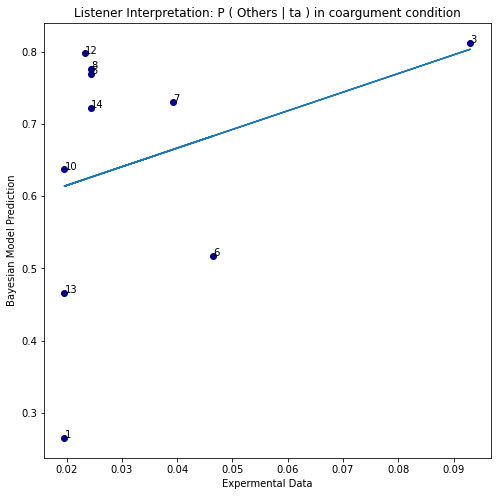

x: mean=0.033 stdv=0.022
y: mean=0.650 stdv=0.170
Statistics: LinregressResult(slope=2.581631038745149, intercept=0.5633343492500658, rvalue=0.32801433910088645, pvalue=0.35481411784060635, stderr=2.628680093516267, intercept_stderr=0.10459839863552296)
R-squared: 0.107593
Pearsons correlation: 0.328
covariance is:  [[0.00051975 0.00134181]
 [0.00134181 0.0321958 ]]
pval = 0.35481411784060635, accept null hypothesis
[coargument,Others,taziji] combination does not exist
[coargument,Others,ziji] combination does not exist


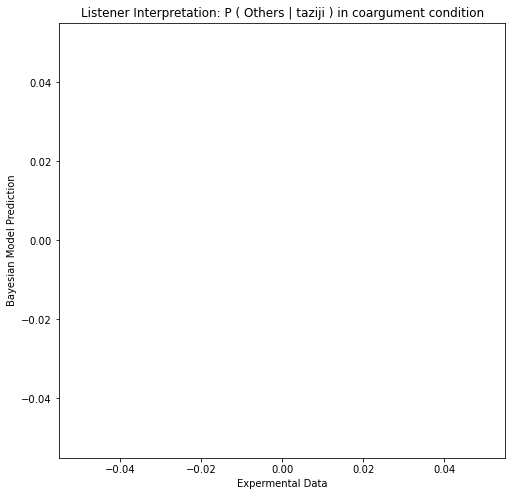

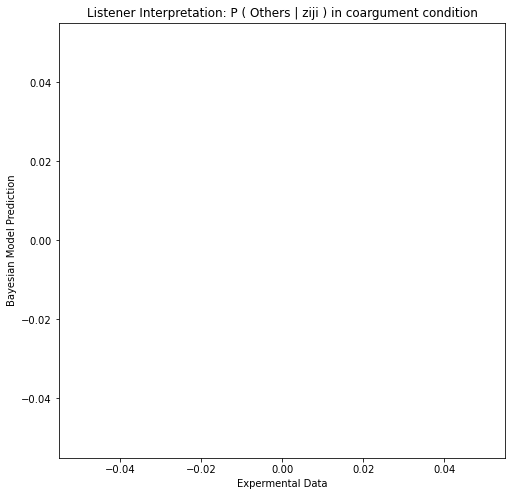

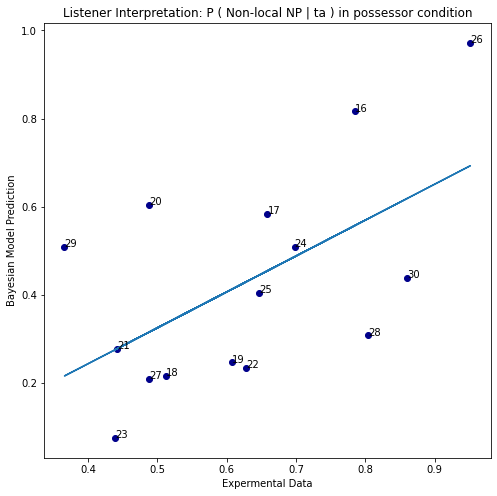

x: mean=0.625 stdv=0.166
y: mean=0.427 stdv=0.237
Statistics: LinregressResult(slope=0.8153873722718273, intercept=-0.08288720989281861, rvalue=0.5705624632954328, pvalue=0.026342218447395916, stderr=0.3255117852689371, intercept_stderr=0.21043585175749274)
R-squared: 0.325542
Pearsons correlation: 0.571
covariance is:  [[0.02943404 0.02400014]
 [0.02400014 0.06011341]]
pval = 0.026342218447395916, reject null hypothesis


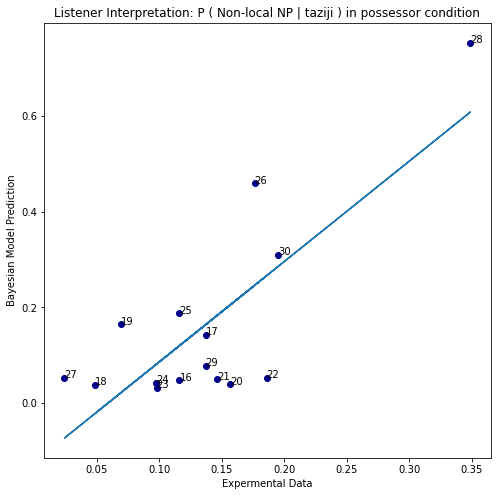

x: mean=0.137 stdv=0.074
y: mean=0.163 stdv=0.197
Statistics: LinregressResult(slope=2.100727432231324, intercept=-0.12475251043066302, rvalue=0.7884280597062084, pvalue=0.00047876145467925363, stderr=0.4545699580778505, intercept_stderr=0.07073670409451213)
R-squared: 0.621619
Pearsons correlation: 0.788
covariance is:  [[0.00582961 0.01224642]
 [0.01224642 0.04138611]]
pval = 0.00047876145467925363, reject null hypothesis


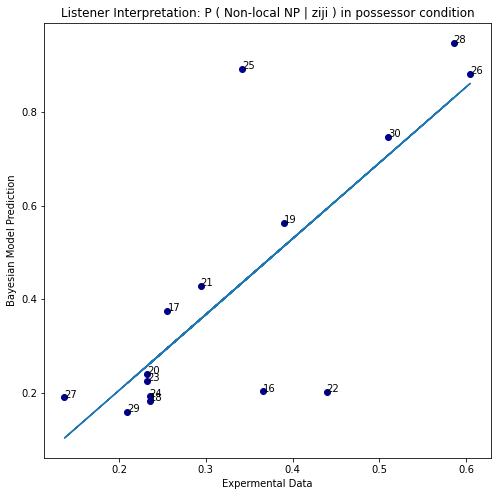

x: mean=0.338 stdv=0.138
y: mean=0.428 stdv=0.288
Statistics: LinregressResult(slope=1.6243377646973132, intercept=-0.12038429215483609, rvalue=0.777595180290338, pvalue=0.0006439046263426129, stderr=0.36428361237282414, intercept_stderr=0.13292178382710843)
R-squared: 0.604654
Pearsons correlation: 0.778
covariance is:  [[0.0203148  0.0329981 ]
 [0.0329981  0.08864579]]
pval = 0.0006439046263426129, reject null hypothesis


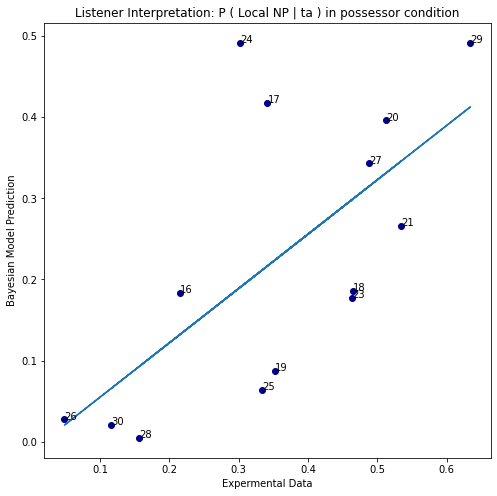

x: mean=0.355 stdv=0.167
y: mean=0.225 stdv=0.170
Statistics: LinregressResult(slope=0.6691093311488157, intercept=-0.011892400631980743, rvalue=0.6577802904074744, pvalue=0.010560180707270652, stderr=0.22117783484722647, intercept_stderr=0.08669338949709864)
R-squared: 0.432675
Pearsons correlation: 0.658
covariance is:  [[0.02996258 0.02004824]
 [0.02004824 0.03100357]]
pval = 0.010560180707270652, reject null hypothesis


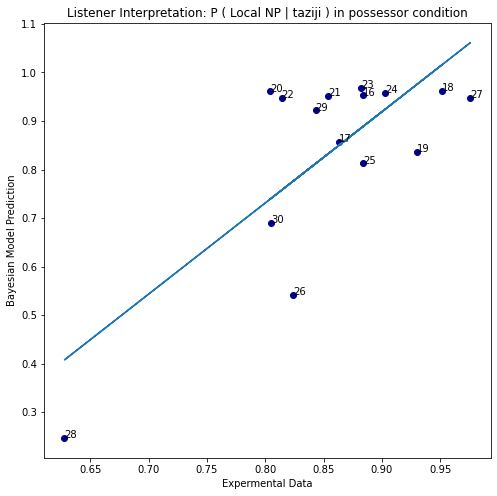

x: mean=0.856 stdv=0.079
y: mean=0.837 stdv=0.197
Statistics: LinregressResult(slope=1.8795887482561557, intercept=-0.7723944593342292, rvalue=0.7557057507460709, pvalue=0.0011191285584400523, stderr=0.45177367512525224, intercept_stderr=0.38845326234608013)
R-squared: 0.571091
Pearsons correlation: 0.756
covariance is:  [[0.00669013 0.01257469]
 [0.01257469 0.04138611]]
pval = 0.0011191285584400523, reject null hypothesis


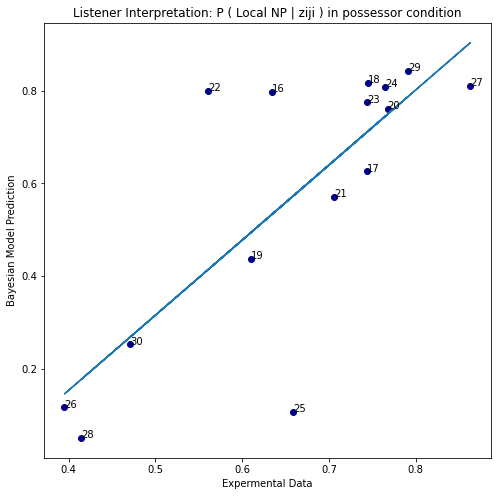

x: mean=0.658 stdv=0.137
y: mean=0.572 stdv=0.288
Statistics: LinregressResult(slope=1.6191755888135795, intercept=-0.4937921417717418, rvalue=0.7735780879708636, pvalue=0.0007158047424436438, stderr=0.36787688116427425, intercept_stderr=0.24726005368759385)
R-squared: 0.598423
Pearsons correlation: 0.774
covariance is:  [[0.02023385 0.03276216]
 [0.03276216 0.08864579]]
pval = 0.0007158047424436438, reject null hypothesis


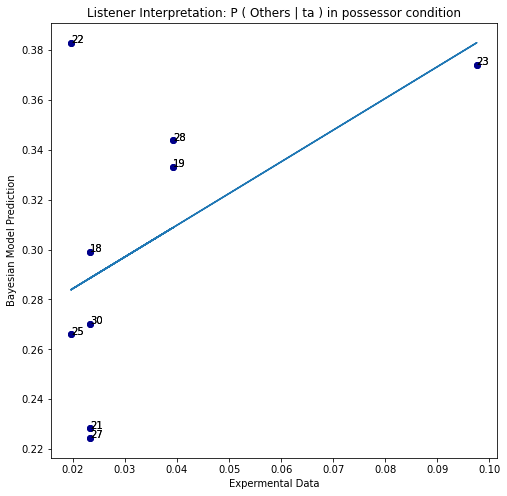

x: mean=0.034 stdv=0.023
y: mean=0.302 stdv=0.056
Statistics: LinregressResult(slope=1.2710453927916436, intercept=0.25894102604826147, rvalue=0.5330384347094099, pvalue=0.022739392209767294, stderr=0.5043820635573609, intercept_stderr=0.02094933672155545)
R-squared: 0.284130
Pearsons correlation: 0.533
covariance is:  [[0.00058469 0.00074317]
 [0.00074317 0.00332454]]
pval = 0.022739392209767294, reject null hypothesis
[possessor,Others,taziji] combination does not exist
[possessor,Others,ziji] combination does not exist


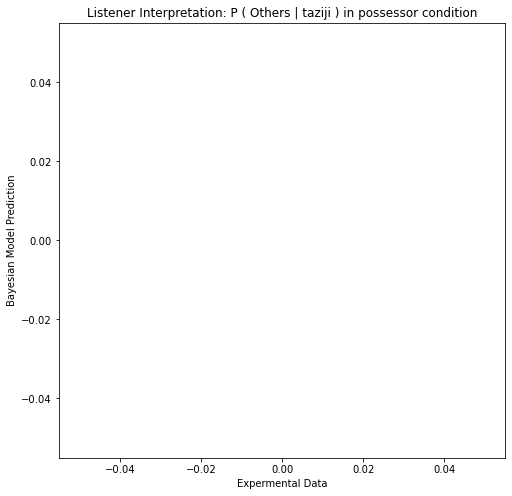

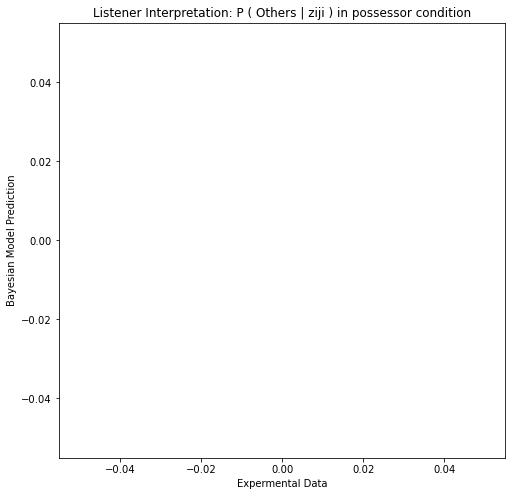

In [71]:
c1 = ['coargument','possessor'] #one for each condition
c2 = ['Non-local NP', 'Local NP','Others']
c3 = ['ta', 'taziji', 'ziji']

for i in c1:
    for j in c2:
        for k in c3:
            try:
                plot_Posterior(df,i,j,k)
                
            except:
                print('[{},{},{}] combination does not exist'.format(i,j,k))
# Speaker/Others + ta + co-argument accept the null hypothesis

| p<0.01 | 0.01<p<0.05 | p>0.05 | 
| --- | --- | --- | 
| 'possessor','Speaker','ta' (0.0000616)  | 'possessor','Speaker','ziji' (0.018)| 'co-argument','Speaker','ta'(0.36) |  
| 'co-argument','Clause Subject','ziji' (0.0004)| 'possessor','Speaker','taziji' (0.028)| 'co-argument','Speaker','taziji'(0.50) |  
| 'possessor','Clause Subject','ziji'(0.0011) | 'co-argument','Clause Subject','taziji'(0.03)| 'co-argument','Clause Subject','ta'(0.61) |
| 'possessor','Clause Subject','ta' (0.0016)| 'possessor','Clause Subject','taziji'(0.04)  |  |
| |   'co-argument','Speaker','ziji'(0.04) |  |

# Log transformation
| p<0.01 | 0.01<p<0.05 | p>0.05 | 
| --- | --- | --- | 
| 'possessor','Speaker','ta' (0.00015)  |'possessor','Speaker','ziji' (0.012) | 'co-argument','Speaker','ta'(0.22) |  
| 'co-argument','Clause Subject','ziji' (0.00001387)| 'co-argument','Clause Subject','taziji'(0.0177) | 'co-argument','Speaker','taziji'(0.46) |  
| 'possessor','Clause Subject','ziji'(0.0002) | 'co-argument','Speaker','ziji'(0.034) | 'co-argument','Clause Subject','ta'(0.274) |
| 'possessor','Clause Subject','ta' (0.0014)|  | 'possessor','Speaker','taziji' (0.054) |
| 'possessor','Clause Subject','taziji'(0.004) |  |  |


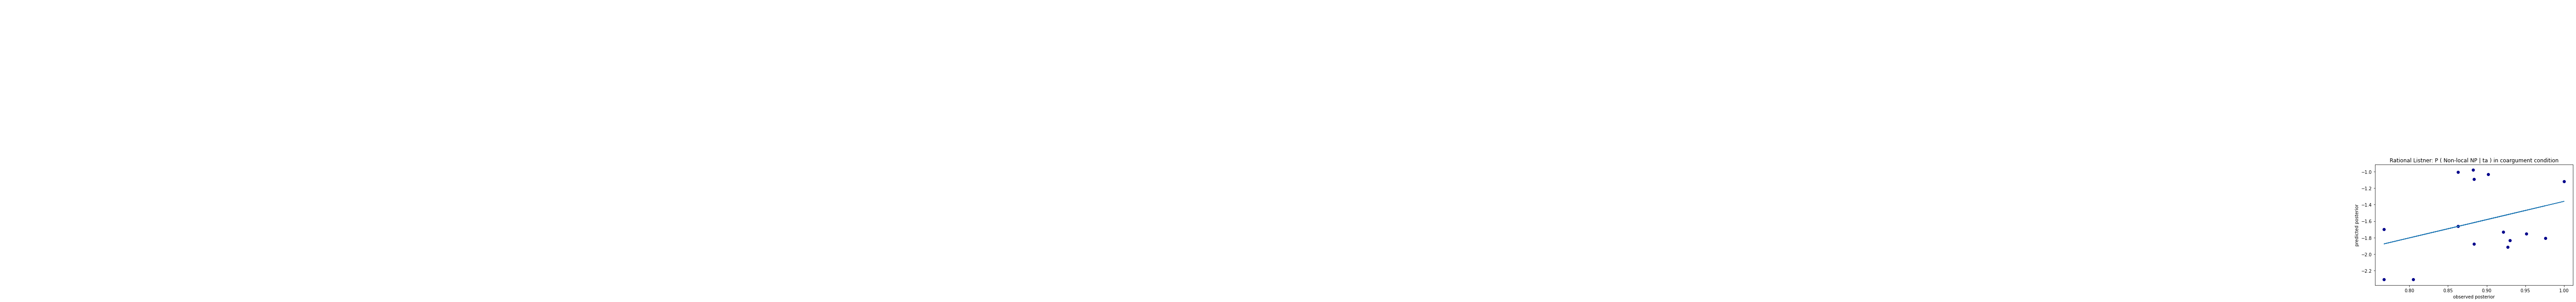

Statistics for coargument,Non-local NP,ta: LinregressResult(slope=2.2151191170206976, intercept=-3.5750676498391187, rvalue=0.336264346760704, pvalue=0.22040827366869042, stderr=1.7206334054989927, intercept_stderr=1.5324713039435267)
R-squared: 0.113074
pval = 0.22040827366869042, accept null hypothesis


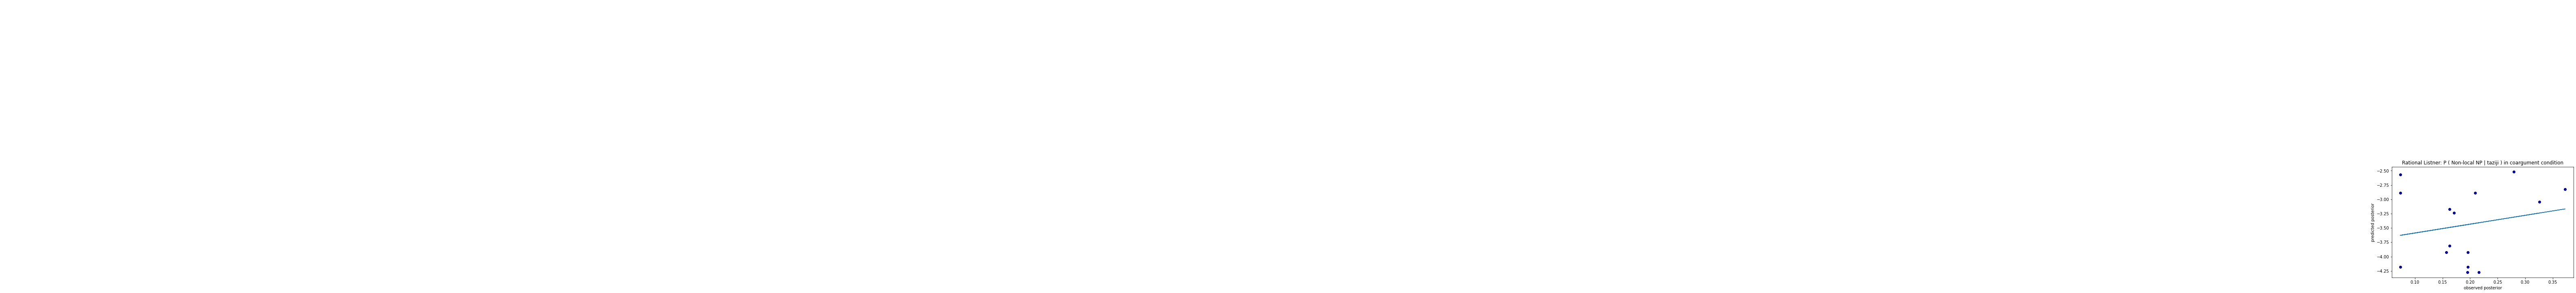

Statistics for coargument,Non-local NP,taziji: LinregressResult(slope=1.5417163820902016, intercept=-3.7420777016596922, rvalue=0.2043098723182755, pvalue=0.4651453407110775, stderr=2.0487292442330984, intercept_stderr=0.42673569240124987)
R-squared: 0.041743
pval = 0.4651453407110775, accept null hypothesis


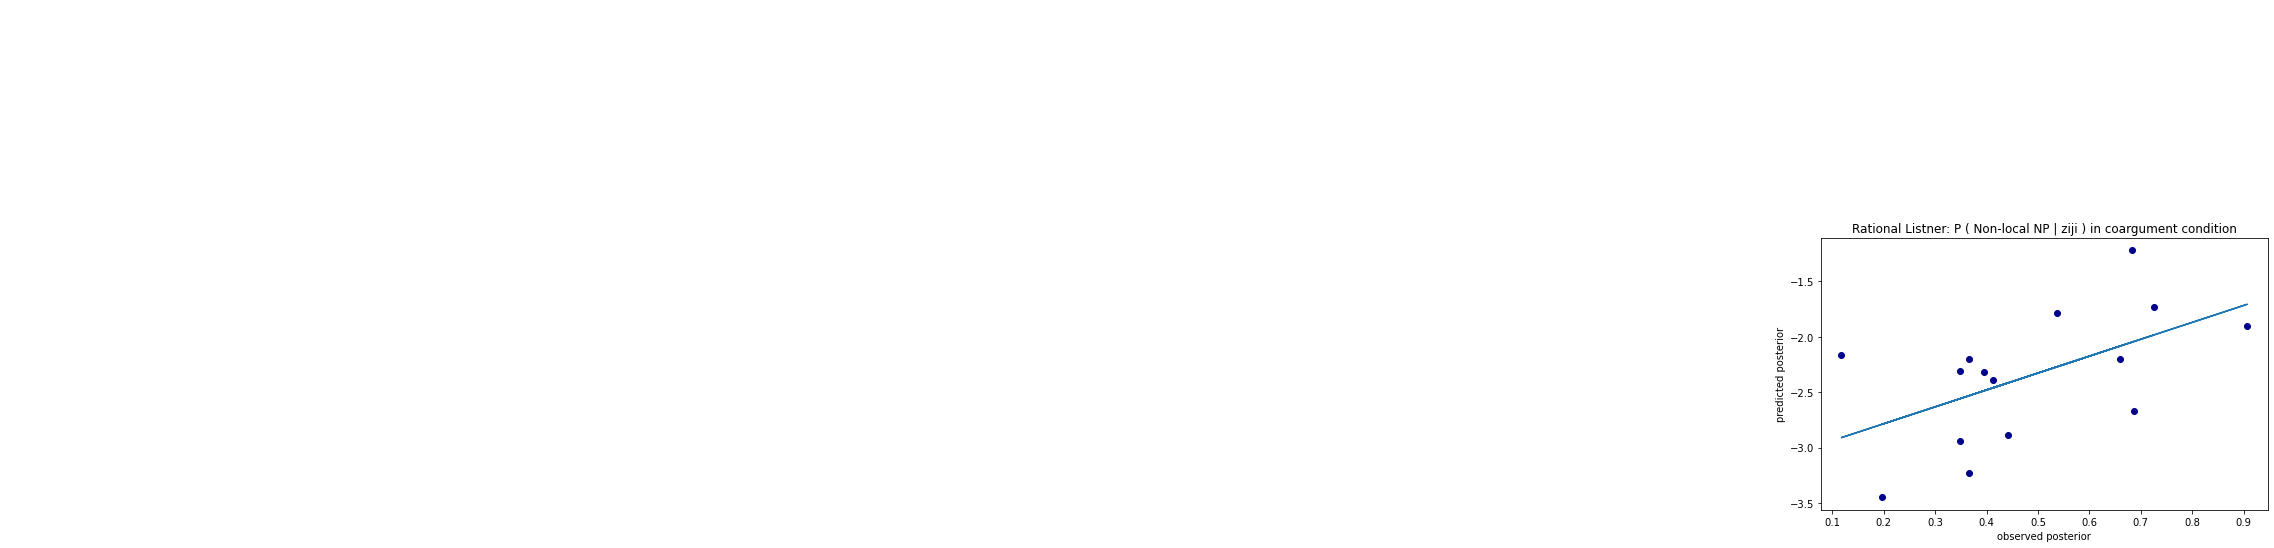

Statistics for coargument,Non-local NP,ziji: LinregressResult(slope=1.5233719176338703, intercept=-3.08988258350605, rvalue=0.5490874379177417, pvalue=0.03401184330026766, stderr=0.6430976085613443, intercept_stderr=0.33590593887403436)
R-squared: 0.301497
pval = 0.03401184330026766, reject null hypothesis


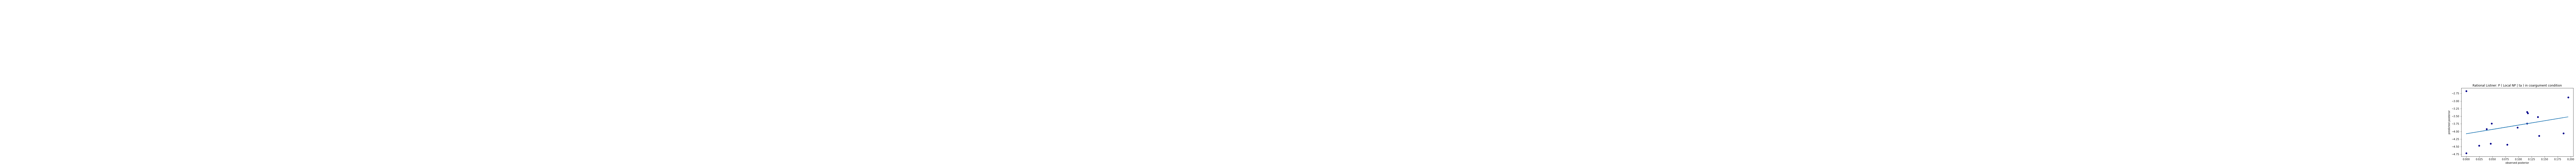

Statistics for coargument,Local NP,ta: LinregressResult(slope=2.8491185171285043, intercept=-4.076517539744843, rvalue=0.3022445267582559, pvalue=0.27356144263860765, stderr=2.492173595412572, intercept_stderr=0.26865896204316353)
R-squared: 0.091352
pval = 0.27356144263860765, accept null hypothesis


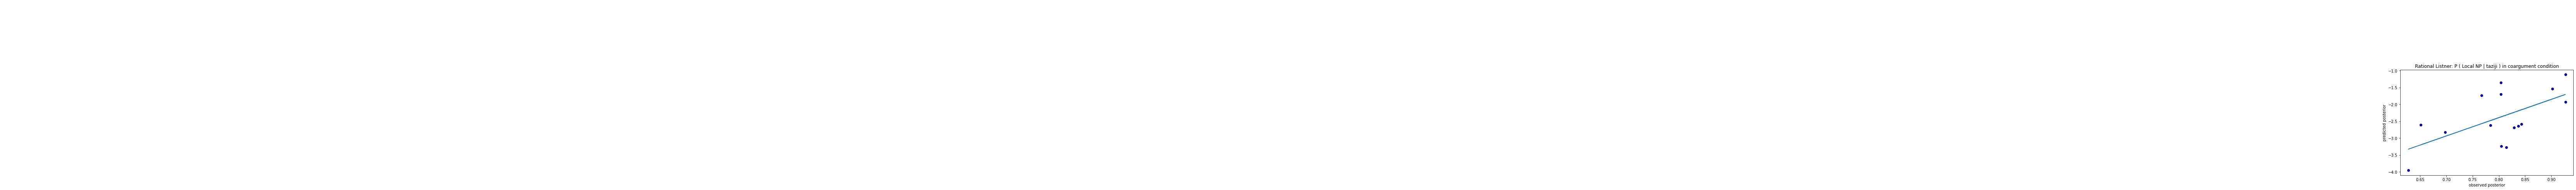

Statistics for coargument,Local NP,taziji: LinregressResult(slope=5.421420832425911, intercept=-6.729669608473668, rvalue=0.6016380441259033, pvalue=0.017656344332945353, stderr=1.9963067235137097, intercept_stderr=1.608929757571025)
R-squared: 0.361968
pval = 0.017656344332945353, reject null hypothesis


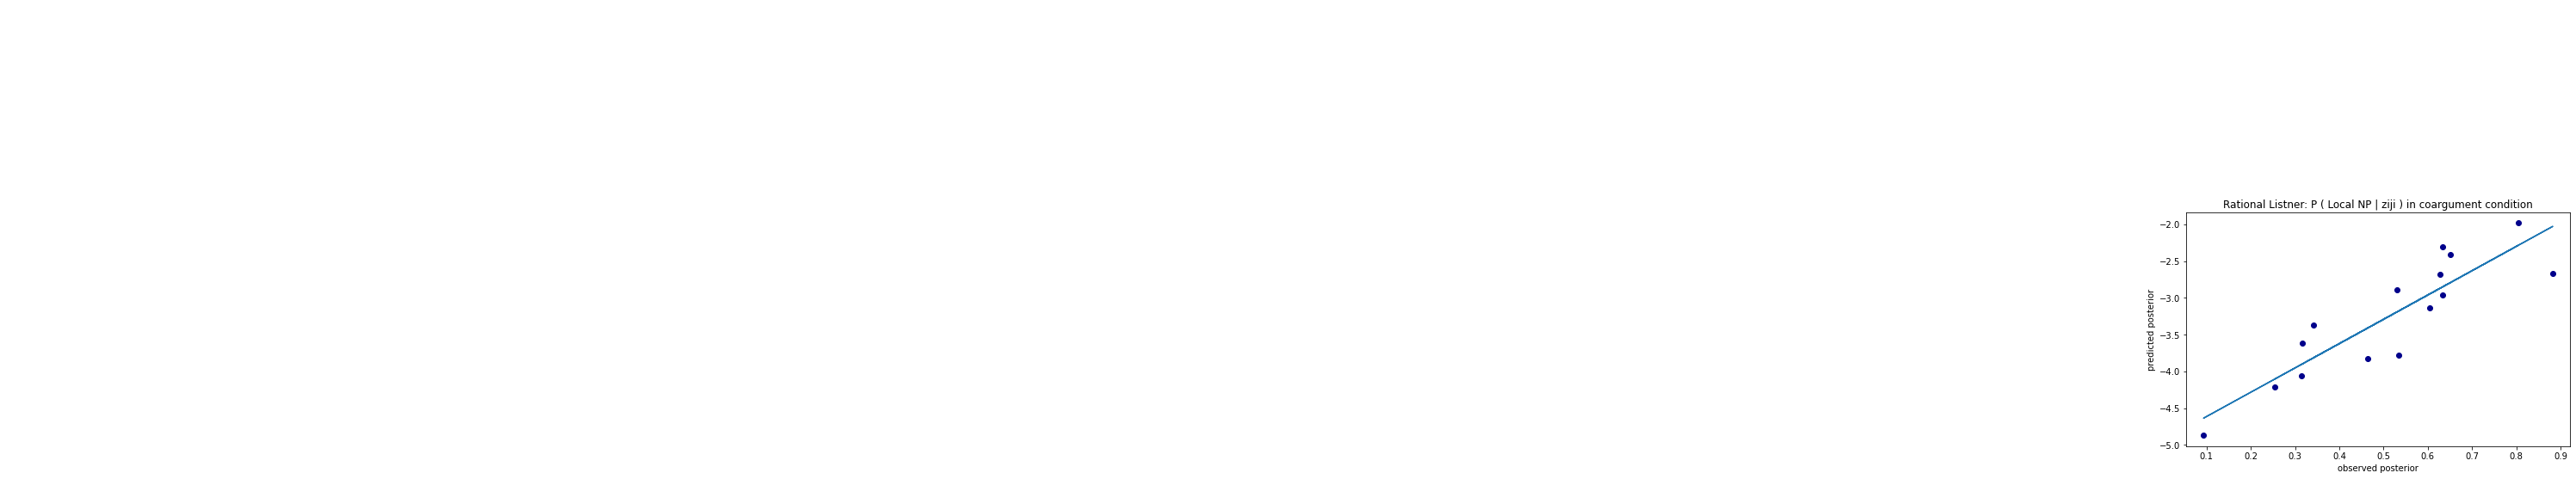

Statistics for coargument,Local NP,ziji: LinregressResult(slope=3.3074778152792015, intercept=-4.944605883196336, rvalue=0.8817120720189853, pvalue=1.3868644138180928e-05, stderr=0.49084602066518795, intercept_stderr=0.27132489760391165)
R-squared: 0.777416
pval = 1.3868644138180928e-05, reject null hypothesis


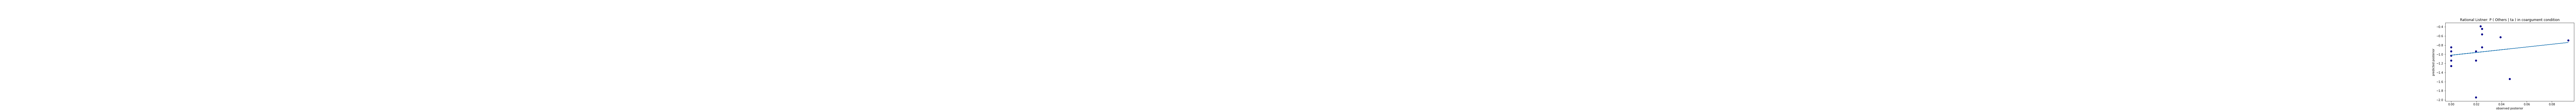

Statistics for coargument,Others,ta: LinregressResult(slope=2.9964275376878415, intercept=-1.020615728470686, rvalue=0.17623806665913272, pvalue=0.5298072362663804, stderr=4.641740511022138, intercept_stderr=0.15080735678855997)
R-squared: 0.031060
pval = 0.5298072362663804, accept null hypothesis


KeyError: "['likelihood'] not in index"

In [8]:
for i in c1:
    for j in c2:
        for k in c3:
            estimatePosterior_log(i,j,k)

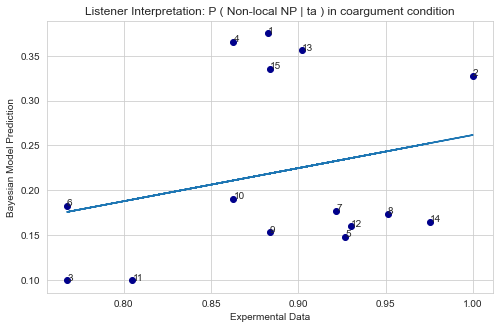

Statistics: LinregressResult(slope=0.3689506306591981, intercept=-0.10726658832703237, rvalue=0.2536157369864703, pvalue=0.361729351515128, stderr=0.3902867768010319, intercept_stderr=0.3476064592519872)
R-squared: 0.064321
pval = 0.361729351515128, accept null hypothesis


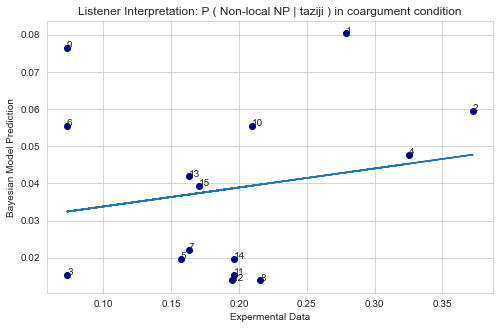

Statistics: LinregressResult(slope=0.051130429145590496, intercept=0.028671870007833025, rvalue=0.19003171125128462, pvalue=0.4975419493247528, stderr=0.07326473071046706, intercept_stderr=0.01526052096748665)
R-squared: 0.036112
pval = 0.4975419493247528, accept null hypothesis


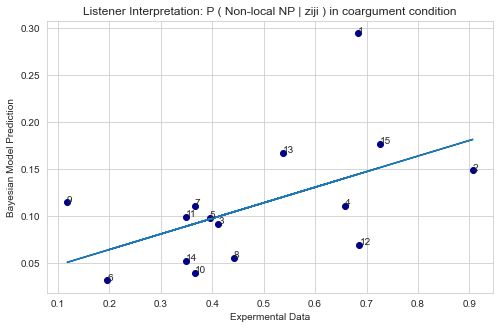

Statistics: LinregressResult(slope=0.16578756452321508, intercept=0.03147385276194627, rvalue=0.5313408548582181, pvalue=0.04152244030420322, stderr=0.07331140588521066, intercept_stderr=0.03829237785401915)
R-squared: 0.282323
pval = 0.04152244030420322, reject null hypothesis


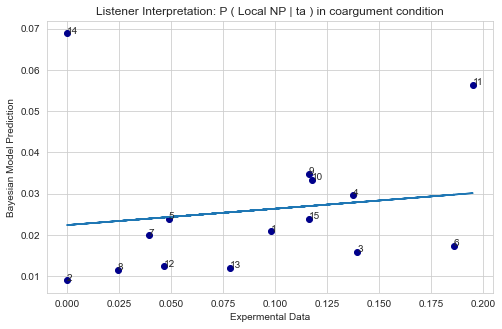

Statistics: LinregressResult(slope=0.03967238284087703, intercept=0.022368917027939125, rvalue=0.14492185836714963, pvalue=0.6063288015176086, stderr=0.07512310698278854, intercept_stderr=0.008098350766818212)
R-squared: 0.021002
pval = 0.6063288015176086, accept null hypothesis


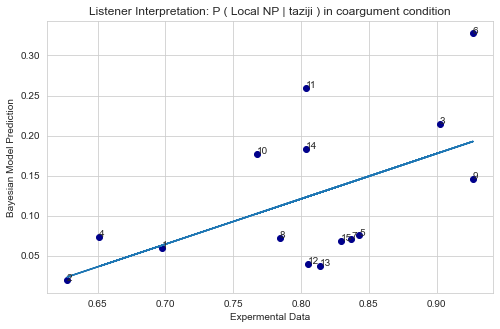

Statistics: LinregressResult(slope=0.5652966266456042, intercept=-0.3312903111565883, rvalue=0.5478622005260374, pvalue=0.034494916833141515, stderr=0.239405947717142, intercept_stderr=0.1929499855331011)
R-squared: 0.300153
pval = 0.034494916833141515, reject null hypothesis


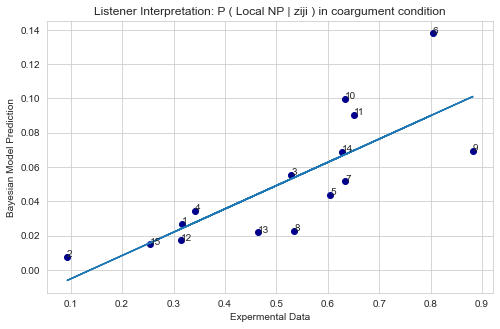

Statistics: LinregressResult(slope=0.13588028078372497, intercept=-0.018769777559268445, rvalue=0.791027368993119, pvalue=0.00044479069359866074, stderr=0.02914667819158616, intercept_stderr=0.01611140590507216)
R-squared: 0.625724
pval = 0.00044479069359866074, reject null hypothesis


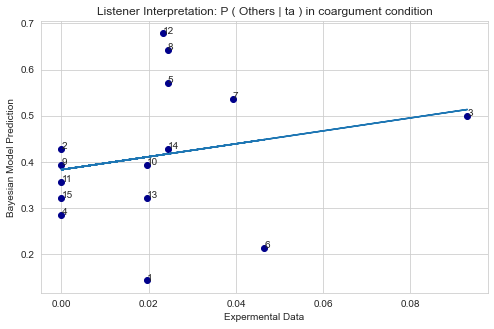

Statistics: LinregressResult(slope=1.402072964802933, intercept=0.3830661626945839, rvalue=0.22678682051035579, pvalue=0.4163242430257088, stderr=1.6699955023837614, intercept_stderr=0.05425714922349678)
R-squared: 0.051432
pval = 0.4163242430257088, accept null hypothesis


KeyError: "['likelihood'] not in index"

In [30]:
c1 = ['coargument','possessor'] #one for each condition
c2 = ['Non-local NP', 'Local NP','Others']
c3 = ['ta', 'taziji', 'ziji']



for i in c1:
    for j in c2:
        for k in c3:
            estimatePosterior(i,j,k)

# Qualitative

2

In [65]:

def violintPlot(condition, type, order):
    
    #order = ['Non-local NP','Local NP', 'others']
    
    posterior = data[(data.experiment == 'posterior')&(data.type == type)][['senID','type','condition','selection','Prob']]
    sns.set_style('whitegrid')

    x = "selection"
    y = "Prob"
    order = order
    ax = sns.boxplot(data=posterior[(posterior.condition == condition)], x=x, y=y, order=order).set(title='{} Perception Distribution in {} condition'.format(condition, type))
    ax = sns.stripplot(data=posterior[(posterior.condition == condition)], x=x, y=y, order=order,palette = "pastel")
    ax = sns.violinplot(data=posterior[(posterior.condition == condition)], x=x, y=y, order=order)

    if len(order) == 3:
        pval_1 = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[1]
        print("The differences between P(Non-local NP | {}) and P(Local NP | {}) is significant with p-value: {}".format(condition, condition, pval_1))

        pval_2 = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[2])].Prob)[1]
        print("The differences between P(Non-local NP | {}) and P(Others | {}) is significant with p-value: {}".format(condition, condition, pval_2))

        pval_3 = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[2])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[1]
        print("The differences between P(Local NP | {}) and P(Others | {}) is significant with p-value: {}".format(condition, condition, pval_3))
    
    else:
        pval = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[1]
        print("The differences between P(Non-local NP | {}) and P(Local NP | {}) is significant with p-value: {}".format(condition, condition, pval))


The differences between P(Non-local NP | ziji) and P(Local NP | ziji) is significant with p-value: 0.6757348888231118


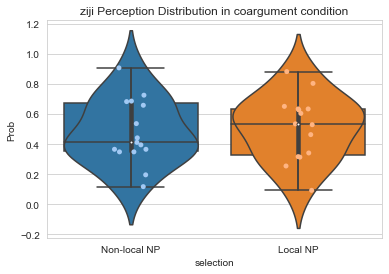

In [66]:
violintPlot('ziji', 'coargument', ['Non-local NP','Local NP'])

The differences between P(Non-local NP | ziji) and P(Local NP | ziji) is significant with p-value: 1.206813028640894e-06


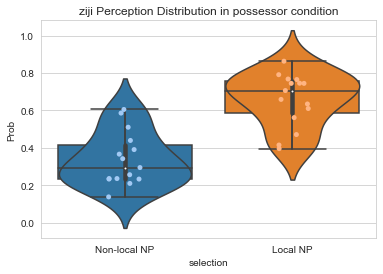

In [67]:
violintPlot('ziji', 'possessor', ['Non-local NP','Local NP'])

The differences between P(Non-local NP | taziji) and P(Local NP | taziji) is significant with p-value: 1.2147899995249954e-20


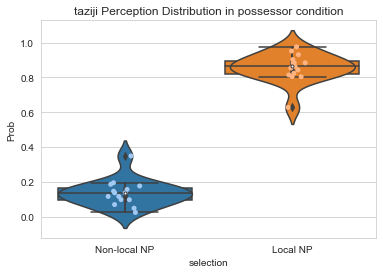

In [68]:
violintPlot('taziji','possessor', ['Non-local NP','Local NP'])

The differences between P(Non-local NP | taziji) and P(Local NP | taziji) is significant with p-value: 1.4167025610704543e-17


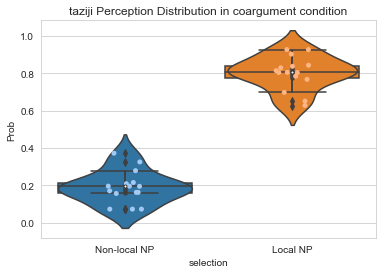

In [69]:
violintPlot('taziji','coargument', ['Non-local NP','Local NP'])

The differences between P(Non-local NP | ta) and P(Local NP | ta) is significant with p-value: 8.54837675802721e-23
The differences between P(Non-local NP | ta) and P(Others | ta) is significant with p-value: 3.433157010434176e-22
The differences between P(Local NP | ta) and P(Others | ta) is significant with p-value: 0.0010379632207879737


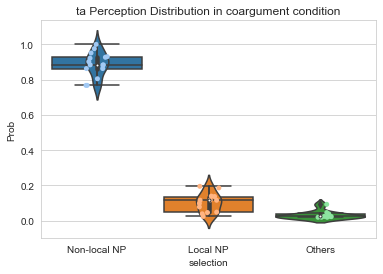

In [70]:
violintPlot('ta', 'coargument', ['Non-local NP','Local NP', 'Others'])

The differences between P(Non-local NP | ta) and P(Local NP | ta) is significant with p-value: 0.00015274413048322344
The differences between P(Non-local NP | ta) and P(Others | ta) is significant with p-value: 8.812504053366082e-10
The differences between P(Local NP | ta) and P(Others | ta) is significant with p-value: 1.0490089152215932e-05


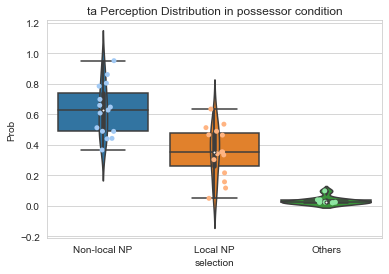

In [71]:
violintPlot('ta', 'possessor', ['Non-local NP','Local NP', 'Others'])

The differences between P(Non-local NP | ziji) and P(Local NP | ziji) is significant with p-value: 0.000803


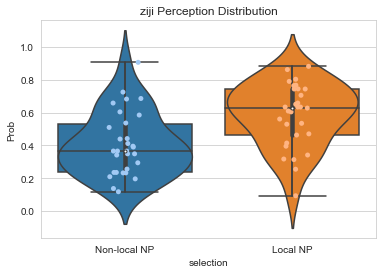

In [15]:




# x = "selection"
# y = "Prob"
# order = ['Non-local NP','Local NP']
# ax = sns.boxplot(data=posterior[(posviolintPlot('taziji', ['Non-local NP','Local NP'])terior.condition == 'ziji')], x=x, y=y, order=order).set(title='ziji Perception Distribution')
# ax = sns.stripplot(data=posterior[(posterior.condition == 'ziji')], x=x, y=y, order=order,palette = "pastel")
# ax = sns.violinplot(data=posterior[(posterior.condition == 'ziji')], x=x, y=y, order=order)

# pval = stats.ttest_ind(posterior[(posterior.condition == 'ziji')&(posterior.selection == 'Local NP')].Prob, posterior[(posterior.condition == 'ziji')&(posterior.selection == 'Non-local NP')].Prob)[1]
# print("The differences between P(Non-local NP | ziji) and P(Local NP | ziji) is significant with p-value: {}".format(round(pval,6)))


In [ ]:
# posterior = data[data.experiment == 'posterior'][['senID','type','condition','selection','Prob']]
# sns.set_style('whitegrid')

# x = "selection"
# y = "Prob"
# order = ['Non-local NP','Local NP', 'Others']
# ax = sns.boxplot(data=posterior[(posterior.condition == 'ta')], x=x, y=y, order=order).set(title='ziji Perception Distribution')
# ax = sns.stripplot(data=posterior[(posterior.condition == 'ta')], x=x, y=y, order=order,palette = "pastel")
# ax = sns.violinplot(data=posterior[(posterior.condition == 'ta')], x=x, y=y, order=order)

# pval = stats.ttest_ind(posterior[(posterior.condition == 'ziji')&(posterior.selection == 'Local NP')].Prob, posterior[(posterior.condition == 'ziji')&(posterior.selection == 'Non-local NP')].Prob)[1]
# print("The differences between P(Non-local NP | ziji) and P(Local NP | ziji) is significant with p-value: {}".format(round(pval,6)))


In [ ]:
# d = data[data.experiment == 'prior'][['senID','selection','Prob']]
# for i in range(1,30):
#     dd = d[d.senID == i]
#     arr = [dd['senID'].to_numpy(), dd['selection'].to_numpy()]
#     s = pd.Series(dd['Prob'].to_numpy(), index=arr)
#     fig = plt.figure()
    
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(arr[1],list(s[i]))
#     ax.set_ylim([0, 1])
    
#     ax.set_title('Prior for senID = {}'.format(i))
#     plt.show()
    

In [ ]:
# d = data[data.experiment == 'likelihood'][['senID','condition','selection','Prob']]

# for i in range(1,30):
#     dd = d[d.senID == i]
#     arr = [dd['senID'].to_numpy(), dd['condition'].to_numpy(), dd['selection'].to_numpy()]
    
#     s = pd.Series(dd['Prob'].to_numpy(), index=arr)
    
#     fig, (ax1,ax2,ax3) = plt.subplots(nrows=3)
#     s[i]['Speaker'].plot.bar(rot=0, ax = ax1)
#     ax1.set_title('Speaker')
#     s[i]['Clause Subject'].plot.bar(rot=0, ax = ax2)
#     ax2.set_title('Clause Subject')
#     s[i]['Others'].plot.bar(rot=0, ax = ax3)
#     ax3.set_title('Others')
#     fig.suptitle('Likelihood for senID = {}'.format(i))
#     plt.tight_layout()
#     plt.show()
    

In [ ]:

# posterior[(posterior.condition == 'ziji')&(posterior.type == 'co-argument')].groupby(['selection']).mean()
# posterior[(posterior.condition == 'ziji')&(posterior.type == 'possessor')].groupby(['selection']).mean()

In [ ]:

# data_1 = posterior[(posterior.condition == 'ziji')&(posterior.selection == 'Speaker')]['Prob']
# data_2 = posterior[(posterior.condition == 'ziji')&(posterior.selection == 'Clause Subject')]['Prob']
# data2 = [data_1, data_2]
# fig = plt.figure(figsize =(8, 5))

# # Creating axes instance
# ax = fig.add_axes([0,0,1,1])

# # Creating plot
# bp = ax.boxplot(data2)

# # show plot
# plt.show()

In [ ]:
# posterior[(posterior.condition == 'ziji')&(posterior.selection == 'Clause Subject')]['Prob'].describe()

In [ ]:
# posterior[(posterior.condition == 'ziji')&(posterior.selection == 'Speaker')]['Prob'].describe()

In [ ]:
# df1 = data[(data.experiment == 'posterior')][['senID','type','selection','condition','Prob']].rename(columns={"Prob": "posterior",'selection':'c2','condition':"c3",'type':'c1'})
# df2 = data[(data.experiment == 'prior')][['senID','type','selection','Prob']].rename(columns={"Prob": "prior",'selection':'c2','type':'c1'})
# df3 = data[(data.experiment == 'likelihood')][['senID','type','selection','condition','Prob']].rename(columns={"Prob": "likelihood",'selection':'c3','condition':"c2",'type':'c1'})
# result = pd.merge(df1,df2)
# df = pd.merge(result,df3)

# df['estimate_posterior'] = df.apply(lambda row: row.prior * row.likelihood, axis=1)
# df[["senID",'c1',"c2",'c3','posterior','estimate_posterior']]

# df = df.sort_values(by=['senID', 'c3'])
# #display(df)
# arr = [df['senID'].to_numpy(), df['c3'].to_numpy(), df['c2'].to_numpy()]
# arr2 = [df['posterior'].to_numpy(),df['estimate_posterior'].to_numpy()]
# s = pd.Series(df['posterior'].to_numpy(), index=arr)
# s2 = pd.Series(df['estimate_posterior'].to_numpy(), index=arr)
# # display(s)
# # display(s2)


In [ ]:
# for i in range(1,30):
#     font1 = {'family':'serif','color':'blue','size':20}
    
#     fig, (ax1,ax2,ax3) = plt.subplots(nrows=3)
#     s[i]['ziji'].plot.bar(rot=0, ax = ax1)
#     ax1.set_title('ziji_observed')
#     s[i]['taziji'].plot.bar(rot=0, ax = ax2)
#     ax2.set_title('taziji_observed')
#     s[i]['ta'].plot.bar(rot=0, ax = ax3)
#     ax3.set_title('ta_observed')
#     fig.suptitle("SenID: {}".format(i),fontdict = font1, fontsize=16)
#     plt.tight_layout()
#     plt.show()

In [ ]:
# for i in range(1,31):
#     font1 = {'family':'serif','color':'blue','size':20}
    
#     fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
#     s[i]['ziji'].plot.bar(rot=0, ax = ax1)
#     ax1.set_title('ziji_observed')
#     s2[i]['ziji'].plot.bar(rot=0, ax = ax2)
#     ax2.set_title('ziji_estimated')
#     s[i]['taziji'].plot.bar(rot=0, ax = ax3)
#     ax3.set_title('taziji_observed')
#     s2[i]['taziji'].plot.bar(rot=0, ax = ax4)
#     ax4.set_title('taziji_estimated')
#     s[i]['ta'].plot.bar(rot=0, ax = ax5)
#     ax5.set_title('ta_observed')
#     s2[i]['ta'].plot.bar(rot=0, ax = ax6)
#     ax6.set_title('ta_estimated')
#     fig.suptitle("SenID: {}".format(i),fontdict = font1, fontsize=16)
#     plt.tight_layout()
#     plt.show()

# Co-argument

## 1. P (Speaker | 'ta') in co-argument sentences

In [ ]:
estimatePosterior('co-argument','Speaker','ta')
estimatePosterior_log('co-argument','Speaker','ta')

## 2. P (Speaker | 'ziji') in co-argument sentences

In [ ]:
estimatePosterior('co-argument','Speaker','ziji')
estimatePosterior_log('co-argument','Speaker','ziji')

## 3. P (Speaker | 'taziji') in co-argument sentences

In [ ]:
estimatePosterior('co-argument','Speaker','taziji')
estimatePosterior_log('co-argument','Speaker','taziji')

## 4. P (Clause Subject | 'ta') in co-argument sentences

In [ ]:
estimatePosterior('co-argument','Clause Subject','ta')
estimatePosterior_log('co-argument','Clause Subject','ta')

## 5. P (Clause Subject | 'taziji') in co-argument sentences

In [ ]:
estimatePosterior('co-argument','Clause Subject','taziji')
estimatePosterior_log('co-argument','Clause Subject','taziji')

## 6. P (Clause Subject | 'ziji') in co-argument sentences

In [ ]:
estimatePosterior('co-argument','Clause Subject','ziji')
estimatePosterior_log('co-argument','Clause Subject','ziji')

## 7. P (Speaker | 'ta') in possessor sentences

In [ ]:
estimatePosterior('possessor','Speaker','ta')
estimatePosterior_log('possessor','Speaker','ta')

## 8. P (Speaker | 'taziji') in possessor sentences

In [ ]:
estimatePosterior('possessor','Speaker','taziji')
estimatePosterior_log('possessor','Speaker','taziji')

## 9. P (Speaker | 'ziji') in possessor sentences

In [ ]:
estimatePosterior('possessor','Speaker','ziji')
estimatePosterior_log('possessor','Speaker','ziji')

## 10. P (Clause Subject | 'ta') in possessor sentences

In [ ]:
estimatePosterior('possessor','Clause Subject','ta')
estimatePosterior_log('possessor','Clause Subject','ta')

## 11. P (Clause Subject | 'taziji') in possessor sentences

In [ ]:
estimatePosterior('possessor','Clause Subject','taziji')
estimatePosterior_log('possessor','Clause Subject','taziji')

## 12. P (Clause Subject | 'ziji') in possessor sentences

In [ ]:
estimatePosterior('possessor','Clause Subject','ziji')
estimatePosterior_log('possessor','Clause Subject','ziji')

# ALL PLOTS

In [ ]:
c1 = ['co-argument','possessor']
c2 = ['Speaker', 'Clause Subject']
c3 = ['ta', 'taziji', 'ziji']

for i in c1:
    for j in c2:
        for k in c3:
            estimatePosterior(i,j,k)
            

In [ ]:
# for i in c1:
#     for j in c2:
#         for k in c3:
#             estimatePosterior_log(i,j,k)

In [ ]:
S_ziji_po = 0.4756
CS_ziji_po = 0.5156
O_ziji_po = 0.0089

S_taziji_po = 0.1940
CS_taziji_po = 0.7990
O_taziji_po = 0.007

S_ta_po =0.8874
CS_ta_po = 0.0904
O_ta_po = 0.0222

In [ ]:
S_ta_li = 0.601
S_taziji_li = 0.116
S_ziji_li = 0.236

CS_ta_li = 0.1502
CS_taziji_li = 0.6193
CS_ziji_li = 0.2078

In [ ]:
S_pr*S_ta_li

In [ ]:
# Make a random dataset:
height = [S_pr*S_ziji_li, CS_pr*CS_ziji_li, O_pr*0]
bars = ('Speaker|ziji', 'Clause Subject|ziji', 'Other|ziji')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [ ]:
height = [S_pr*S_taziji_li, CS_pr*CS_taziji_li, O_pr*0]
bars = ('Speaker|taziji', 'Clause Subject|taziji', 'Other|taziji')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [ ]:
height = [S_pr*S_ta_li, CS_pr*CS_ta_li, O_pr*1]
bars = ('Speaker|ta', 'Clause Subject|ta', 'Other|ta')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [ ]:
df